<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br> Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 5.  Соревнование Kaggle "Catch Me If You Can"

На этой неделе мы вспомним про концепцию стохастического градиентного спуска и опробуем классификатор Scikit-learn SGDClassifier, который работает намного быстрее на больших выборках, чем алгоритмы, которые мы тестировали на 4 неделе. Также мы познакомимся с данными [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle по идентификации пользователей и сделаем в нем первые посылки. По итогам этой недели дополнительные баллы получат те, кто попадет в топ-30 публичного лидерборда соревнования.

**В этой части проекта Вам могут быть полезны видеозаписи следующих лекций курса "Обучение на размеченных данных":**
   - [Стохатический градиентный спуск](https://www.coursera.org/learn/supervised-learning/lecture/xRY50/stokhastichieskii-ghradiientnyi-spusk)
   - [Линейные модели. Sklearn.linear_model. Классификация](https://www.coursera.org/learn/supervised-learning/lecture/EBg9t/linieinyie-modieli-sklearn-linear-model-klassifikatsiia)
   
**Также рекомендуется вернуться и просмотреть [задание](https://www.coursera.org/learn/supervised-learning/programming/t2Idc/linieinaia-rieghriessiia-i-stokhastichieskii-ghradiientnyi-spusk) "Линейная регрессия и стохастический градиентный спуск" 1 недели 2 курса специализации.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите тетрадку в соответствующем Peer Review. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/1pLsegkAICL9PzOLyAeH9DmDOBfktte0l8JW75uWcTng). 

In [238]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import os
import pickle
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,PredefinedSplit
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

**Считаем данные [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) в DataFrame train_df и test_df (обучающая и тестовая выборки).**

In [239]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'capstone_user_identification'

In [240]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)

In [241]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv'),
                       index_col='session_id')
test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_sessions.csv'),
                      index_col='session_id')

In [242]:
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


**Объединим обучающую и тестовую выборки – это понадобится, чтоб вместе потом привести их к разреженному формату.**

In [244]:
train_test_df = pd.concat([train_df, test_df])

In [245]:
train_df.shape,test_df.shape,train_test_df.shape

((253561, 21), (82797, 20), (336358, 21))

В обучающей выборке видим следующие признаки:
    - site1 – индекс первого посещенного сайта в сессии
    - time1 – время посещения первого сайта в сессии
    - ...
    - site10 – индекс 10-го посещенного сайта в сессии
    - time10 – время посещения 10-го сайта в сессии
    - user_id – ID пользователя
    
Сессии пользователей выделены таким образом, что они не могут быть длинее получаса или 10 сайтов. То есть сессия считается оконченной либо когда пользователь посетил 10 сайтов подряд, либо когда сессия заняла по времени более 30 минут. 

**Посмотрим на статистику признаков.**

Пропуски возникают там, где сессии короткие (менее 10 сайтов). Скажем, если человек 1 января 2015 года посетил *vk.com* в 20:01, потом *yandex.ru* в 20:29, затем *google.com* в 20:33, то первая его сессия будет состоять только из двух сайтов (site1 – ID сайта *vk.com*, time1 – 2015-01-01 20:01:00, site2 – ID сайта  *yandex.ru*, time2 – 2015-01-01 20:29:00, остальные признаки – NaN), а начиная с *google.com* пойдет новая сессия, потому что уже прошло более 30 минут с момента посещения *vk.com*.

In [246]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
site1     253561 non-null int64
time1     253561 non-null object
site2     250098 non-null float64
time2     250098 non-null object
site3     246919 non-null float64
time3     246919 non-null object
site4     244321 non-null float64
time4     244321 non-null object
site5     241829 non-null float64
time5     241829 non-null object
site6     239495 non-null float64
time6     239495 non-null object
site7     237297 non-null float64
time7     237297 non-null object
site8     235224 non-null float64
time8     235224 non-null object
site9     233084 non-null float64
time9     233084 non-null object
site10    231052 non-null float64
time10    231052 non-null object
target    253561 non-null int64
dtypes: float64(9), int64(2), object(10)
memory usage: 42.6+ MB


In [247]:
test_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,2014-10-04 11:19:54,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,2014-07-03 11:01:09,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,2014-12-05 15:56:16,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36
4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,2014-11-04 10:03:21,3374.0,2014-11-04 10:03:22,50.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:23,3374.0,2014-11-04 10:03:23
5,301,2014-05-16 15:05:31,301.0,2014-05-16 15:05:32,301.0,2014-05-16 15:05:33,66.0,2014-05-16 15:05:39,67.0,2014-05-16 15:05:40,69.0,2014-05-16 15:05:40,70.0,2014-05-16 15:05:40,68.0,2014-05-16 15:05:40,71.0,2014-05-16 15:05:40,167.0,2014-05-16 15:05:44


In [248]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82797 entries, 1 to 82797
Data columns (total 20 columns):
site1     82797 non-null int64
time1     82797 non-null object
site2     81308 non-null float64
time2     81308 non-null object
site3     80075 non-null float64
time3     80075 non-null object
site4     79182 non-null float64
time4     79182 non-null object
site5     78341 non-null float64
time5     78341 non-null object
site6     77566 non-null float64
time6     77566 non-null object
site7     76840 non-null float64
time7     76840 non-null object
site8     76151 non-null float64
time8     76151 non-null object
site9     75484 non-null float64
time9     75484 non-null object
site10    74806 non-null float64
time10    74806 non-null object
dtypes: float64(9), int64(1), object(10)
memory usage: 13.3+ MB


In [249]:
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336358 entries, 1 to 82797
Data columns (total 21 columns):
site1     336358 non-null int64
site10    305858 non-null float64
site2     331406 non-null float64
site3     326994 non-null float64
site4     323503 non-null float64
site5     320170 non-null float64
site6     317061 non-null float64
site7     314137 non-null float64
site8     311375 non-null float64
site9     308568 non-null float64
target    253561 non-null float64
time1     336358 non-null object
time10    305858 non-null object
time2     331406 non-null object
time3     326994 non-null object
time4     323503 non-null object
time5     320170 non-null object
time6     317061 non-null object
time7     314137 non-null object
time8     311375 non-null object
time9     308568 non-null object
dtypes: float64(10), int64(1), object(10)
memory usage: 56.5+ MB


**В обучающей выборке – 2297 сессий одного пользователя (Alice) и 251264 сессий – других пользователей, не Элис. Дисбаланс классов очень сильный, и смотреть на долю верных ответов (accuracy) непоказательно.**

In [250]:
train_df['target'].value_counts()

0    251264
1      2297
Name: target, dtype: int64

**Пока для прогноза будем использовать только индексы посещенных сайтов. Индексы нумеровались с 1, так что заменим пропуски на нули.**

In [251]:
train_test_df_sites = train_test_df[['site%d' % i for i in range(1, 11)]].fillna(0).astype('int')

In [252]:
train_test_df_sites.head(10)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
1,718,0,0,0,0,0,0,0,0,0
2,890,941,3847,941,942,3846,3847,3846,1516,1518
3,14769,39,14768,14769,37,39,14768,14768,14768,14768
4,782,782,782,782,782,782,782,782,782,782
5,22,177,175,178,177,178,175,177,177,178
6,570,21,570,21,21,0,0,0,0,0
7,803,23,5956,17513,37,21,803,17514,17514,17514
8,22,21,29,5041,14422,23,21,5041,14421,14421
9,668,940,942,941,941,942,940,23,21,22


**Создайте разреженные матрицы *X_train_sparse* и *X_test_sparse* аналогично тому, как мы это делали ранее. Используйте объединенную матрицу *train_test_df_sites*, потом разделите обратно на обучающую и тестовую части.**

Обратите внимание на то, что в  сессиях меньше 10 сайтов  у нас остались нули, так что первый признак (сколько раз попался 0) по смыслу отличен от остальных (сколько раз попался сайт с индексом $i$). Поэтому первый столбец разреженной матрицы надо будет удалить.

**Выделите в отдельный вектор *y* ответы на обучающей выборке.**

def to_sparse(docs):
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for d in docs:
        for term in d:
            index = vocabulary.setdefault(term, len(vocabulary))
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))
    return csr_matrix((data, indices, indptr), dtype=int),vocabulary

In [253]:
def crs2(train_data):
    #train_data=train_data.iloc[:,:-1]
    indptr = [0]
    indices = []
    data = []
    for index, row in train_data.iterrows():
        #print('index:',index)
        for j, column in row.iteritems():
            indices.append(column)
            data.append(1)
        indptr.append(len(indices))
    #csr_mat=csr_matrix((data, indices, indptr), dtype=int).toarray()
    csr_mat=csr_matrix((data, indices, indptr), dtype=int)
    return csr_mat

In [254]:
#train_test_sparse,vocabulary = to_sparse(train_test_df_sites.values)#[0]#''' ВАШ КОД ЗДЕСЬ '''
train_test_sparse=crs2(train_test_df_sites)[:,1:]
X_train_sparse = train_test_sparse[:train_df.shape[0]] #''' ВАШ КОД ЗДЕСЬ '''
X_test_sparse = train_test_sparse[train_df.shape[0]:]#''' ВАШ КОД ЗДЕСЬ '''
y = train_df.iloc[:, -1]#''' ВАШ КОД ЗДЕСЬ '''

In [255]:
X_train_sparse.shape,X_test_sparse.shape,X_train_sparse.shape[0]+X_test_sparse.shape[0],train_test_df_sites.shape[0]

((253561, 48371), (82797, 48371), 336358, 336358)

**<font color='red'>Вопрос 1. </font> Выведите размерности матриц *X_train_sparse* и *X_test_sparse* – 4 числа на одной строке через пробел: число строк и столбцов матрицы *X_train_sparse*, затем число строк и столбцов матрицы *X_test_sparse*.**

In [256]:
print('{} {} {} {}'.format(X_train_sparse.shape[0], X_train_sparse.shape[1], X_test_sparse.shape[0], X_test_sparse.shape[1]))

253561 48371 82797 48371


**Сохраним в pickle-файлы объекты *X_train_sparse*, *X_test_sparse* и *y* (последний – в файл *kaggle_data/train_target.pkl*).**

In [257]:
with open(os.path.join(PATH_TO_DATA, 'X_train_sparse.pkl'), 'wb') as X_train_sparse_pkl:
    pickle.dump(X_train_sparse, X_train_sparse_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'X_test_sparse.pkl'), 'wb') as X_test_sparse_pkl:
    pickle.dump(X_test_sparse, X_test_sparse_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'train_target.pkl'), 'wb') as train_target_pkl:
    pickle.dump(y, train_target_pkl, protocol=2)

**Разобьем обучающую выборку на 2 части в пропорции 7/3, причем не перемешивая. Исходные данные упорядочены по времени, тестовая выборка по времени четко отделена от обучающей, это же соблюдем и здесь.**

In [258]:
train_share = int(.7 * X_train_sparse.shape[0])
X_train, y_train = X_train_sparse[:train_share, :], y[:train_share]
X_valid, y_valid  = X_train_sparse[train_share:, :], y[train_share:]

**Создайте объект `sklearn.linear_model.SGDClassifier` с логистической функцией потерь и параметром *random_state*=17. Остальные параметры оставьте по умолчанию, разве что *n_jobs*=-1 никогда не помешает. Обучите  модель на выборке `(X_train, y_train)`.**

In [259]:
sgd_logit = SGDClassifier(loss='log', n_jobs=-1,random_state=17) #''' ВАШ КОД ЗДЕСЬ '''
sgd_logit.fit(X_train, y_train) #''' ВАШ КОД ЗДЕСЬ '''

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=17, shuffle=True,
       tol=None, verbose=0, warm_start=False)

**Сделайте прогноз в виде предсказанных вероятностей того, что это сессия Элис, на отложенной выборке *(X_valid, y_valid)*.**

In [260]:
logit_valid_pred_proba = sgd_logit.predict_proba(X_valid) #''' ВАШ КОД ЗДЕСЬ '''

**<font color='red'>Вопрос 2. </font> Посчитайте ROC AUC логистической регрессии, обученной с помощью стохастического градиентного спуска, на отложенной выборке. Округлите до 3 знаков после разделителя.**

In [263]:
''' ВАШ КОД ЗДЕСЬ '''
round(roc_auc_score(y_valid,sgd_logit.predict_proba(X_valid)[:,1]),3)

0.934

**Сделайте прогноз в виде предсказанных вероятностей отнесения к классу 1 для тестовой выборки с помощью той же *sgd_logit*, обученной уже на всей обучающей выборке (а не на 70%).**

In [264]:
%%time
sgd_logit=SGDClassifier(loss='log', n_jobs=-1,random_state=17) #''' ВАШ КОД ЗДЕСЬ '''
sgd_logit.fit(X_train_sparse, y)
logit_test_pred_proba = sgd_logit.predict_proba(X_test_sparse) # ''' ВАШ КОД ЗДЕСЬ '''
logit_test_pred = sgd_logit.predict(X_test_sparse)

Wall time: 482 ms


**Запишите ответы в файл и сделайте посылку на Kaggle. Дайте своей команде (из одного человека) на Kaggle говорящее название – по шаблону "[YDF & MIPT] Coursera_Username", чтоб можно было легко идентифицировать Вашу посылку на [лидерборде](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/leaderboard/public).**

**Результат, который мы только что получили, соответствует бейзлайну "SGDCLassifer" на лидерборде, задача на эту неделю – как минимум его побить.**

In [265]:
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [266]:
write_to_submission_file(logit_test_pred_proba[:,1], 'gur19.4.csv') #''' ВАШ КОД ЗДЕСЬ '''

# Второй вариант

In [267]:
with open(os.path.join(PATH_TO_DATA, 'X_train_sparse.pkl'), 'rb') as X_train_sparse_pkl:
    X_train_sparse = pickle.load(X_train_sparse_pkl)
with open(os.path.join(PATH_TO_DATA, 'X_test_sparse.pkl'), 'rb') as X_test_sparse_pkl:
    X_test_sparse = pickle.load(X_test_sparse_pkl)
with open(os.path.join(PATH_TO_DATA, 'train_target.pkl'), 'rb') as train_target_pkl:
    y = pickle.load(train_target_pkl)  

In [268]:
from sklearn.model_selection import learning_curve
%matplotlib inline
from matplotlib import pyplot as plt

def plot_learning_curve(val_train, val_test, train_sizes, 
                        xlabel='Training Set Size', ylabel='score'):
    def plot_with_err(x, data, **kwargs):
        mu, std = data.mean(1), data.std(1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                         facecolor=lines[0].get_color(), alpha=0.2)
    plot_with_err(train_sizes, val_train, label='train')
    plot_with_err(train_sizes, val_test, label='valid')
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.legend(loc='lower right');

In [269]:
%%time
train_sizes = np.linspace(0.4, 1, 50)
estimator = SGDClassifier(loss='log', n_jobs=-1,random_state=17) 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
n_train, val_train, val_test = learning_curve(estimator,X_train_sparse, y, groups=y, train_sizes=train_sizes ,scoring='roc_auc',cv=skf,n_jobs=-1)


Wall time: 1min 34s


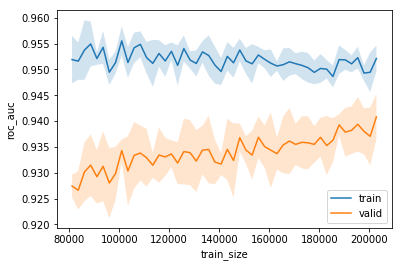

In [270]:
plot_learning_curve(val_train, val_test, n_train, 
                    xlabel='train_size', ylabel='roc_auc')

In [271]:
train_share = int(.7 * X_train_sparse.shape[0])
X_train, y_train = X_train_sparse[:train_share, :], y[:train_share]
X_valid, y_valid  = X_train_sparse[train_share:, :], y[train_share:]
X_train_sparse.shape,y.shape ,X_train.shape

((253561, 48371), (253561,), (177492, 48371))

In [273]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)

In [274]:
#%%time
parameters  = {
    #'alpha': np.linspace(1.0e-05, 3.0e-05, 30), # learning rate
    'max_iter': (5,100,None),
}


sgd_logit=SGDClassifier(loss='log', n_jobs=-1,random_state=17) #''' ВАШ КОД ЗДЕСЬ '''
clf = GridSearchCV(sgd_logit, parameters,scoring='roc_auc',cv=skf)
clf.fit(X_train, y_train)
#clf.fit(X_train_sparse, y)
print('best parameter: %s ' %  clf.best_params_)
print('best_score_ : %.3f' %  clf.best_score_)
clf.best_estimator_

best parameter: {'max_iter': 100} 
best_score_ : 0.943


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=100, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=17, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [275]:
clf.best_score_,clf.cv_results_['mean_test_score'][0],roc_auc_score(y_valid,clf.predict_proba(X_valid)[:,1])

(0.9433375368605661, 0.9358763902630984, 0.9413994689967295)

# Запись результатов модели для Kaggle baseline SGDCLassifer 

In [276]:
%%time
sgd_logit2=SGDClassifier(loss='log',  max_iter=100,n_jobs=-1,random_state=17,)
sgd_logit2.fit(X_train_sparse, y)
logit_test_pred_proba2 = sgd_logit2.predict_proba(X_test_sparse) # '

Wall time: 7.25 s


In [277]:
write_to_submission_file(logit_test_pred_proba2[:,1], 'gur19_5.csv')

Your Best Entry 
You advanced 32 places on the leaderboard!

Your submission scored 0.91424, which is an improvement of your previous score of 0.91273. Great job!

# Второй baseline

Logit +3 features 0.92784

In [278]:
with open(os.path.join(PATH_TO_DATA, 'X_train_sparse.pkl'), 'rb') as X_train_sparse_pkl:
    X_train_sparse = pickle.load(X_train_sparse_pkl)
with open(os.path.join(PATH_TO_DATA, 'X_test_sparse.pkl'), 'rb') as X_test_sparse_pkl:
    X_test_sparse = pickle.load(X_test_sparse_pkl)
with open(os.path.join(PATH_TO_DATA, 'train_target.pkl'), 'rb') as train_target_pkl:
    y = pickle.load(train_target_pkl)  

In [279]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv'),
                       index_col='session_id')
test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_sessions.csv'),
                      index_col='session_id')

In [280]:
train_test_df = pd.concat([train_df, test_df])

In [281]:
train_test_df_sites = train_test_df[['site%d' % i for i in range(1, 11)]].fillna(0).astype('int')
time_cols=['time%s' % i for i in range(1, 11)]
train_test_df_times = train_test_df[time_cols]
train_test_df_times=train_test_df_times.apply(pd.to_datetime)
train_test_df_times['min_time']=train_test_df_times[train_test_df_times[time_cols].notnull()].min(axis=1)
train_test_df_times['max_time']=train_test_df_times[train_test_df_times[time_cols].notnull()].max(axis=1)
train_test_df_times[time_cols] = train_test_df[time_cols].fillna(0)
train_test_df_times['duration']=(train_test_df_times.max_time-train_test_df_times.min_time).dt.total_seconds().astype('int')
train_test_df_times['start_hour']=train_test_df_times.min_time.dt.hour
train_test_df_times['day_of_week']=train_test_df_times.min_time.dt.dayofweek
train_test_df_times['morning']=(train_test_df_times.start_hour.values>=7)&(train_test_df_times.start_hour.values<=11).astype('int')
train_test_df_times['day']=(train_test_df_times.start_hour.values>=12)&(train_test_df_times.start_hour.values<=18).astype('int')
train_test_df_times['evening']=(train_test_df_times.start_hour.values>=19)&(train_test_df_times.start_hour.values<=23).astype('int')
train_test_df_times['night']=(train_test_df_times.start_hour.values>=0)&(train_test_df_times.start_hour.values<=6).astype('int')


In [282]:
train_df.shape,test_df.shape,train_test_df.shape

((253561, 21), (82797, 20), (336358, 21))

In [283]:
train_test_df_sites.shape,train_test_df_times.shape

((336358, 10), (336358, 19))

In [284]:
train_test_df_times.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336358 entries, 1 to 82797
Data columns (total 19 columns):
time1          336358 non-null object
time2          336358 non-null object
time3          336358 non-null object
time4          336358 non-null object
time5          336358 non-null object
time6          336358 non-null object
time7          336358 non-null object
time8          336358 non-null object
time9          336358 non-null object
time10         336358 non-null object
min_time       336358 non-null datetime64[ns]
max_time       336358 non-null datetime64[ns]
duration       336358 non-null int32
start_hour     336358 non-null int64
day_of_week    336358 non-null int64
morning        336358 non-null int32
day            336358 non-null int32
evening        336358 non-null int32
night          336358 non-null int32
dtypes: datetime64[ns](2), int32(5), int64(2), object(10)
memory usage: 44.9+ MB


In [286]:
train_test_sparse=crs2(train_test_df_sites)[:,1:]
new_features = ['duration','start_hour','day_of_week','morning','day','evening','night']
train_test_time_sparse=crs2(train_test_df_times[new_features])
X_train_test_fe_sparse = hstack((train_test_sparse, train_test_time_sparse), format='csr')
X_train_valid_sparse = X_train_test_fe_sparse[:train_df.shape[0]] 
X_test_sparse = X_train_test_fe_sparse[train_df.shape[0]:]
y = train_df.iloc[:, -1]

In [287]:
train_test_time_sparse.shape,train_test_sparse.shape,X_train_test_fe_sparse.shape

((336358, 1801), (336358, 48371), (336358, 50172))

In [288]:
X_train_valid_sparse.shape,X_test_sparse.shape,y.shape

((253561, 50172), (82797, 50172), (253561,))

In [289]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid_sparse, y, test_size=.3)

In [290]:
from sklearn.linear_model import LogisticRegression

In [291]:
lr = LogisticRegression(random_state=17, n_jobs=-1)
%time lr.fit(X_train, y_train);

%time lr_valid_pred_proba = lr.predict_proba(X_valid)

roc_auc_score(y_valid, lr_valid_pred_proba[:,1])

Wall time: 4.04 s
Wall time: 6 ms


0.9803185450252512

In [292]:
%%time
logit3=LogisticRegression(random_state=17, n_jobs=-1)
logit3.fit(X_train_valid_sparse, y)
logit_test_pred_proba3 = logit3.predict_proba(X_test_sparse)

Wall time: 5.57 s


# Запись результатов модели для logit+3features

In [293]:
write_to_submission_file(logit_test_pred_proba3[:,1], 'gur20_1.csv')

AndreySm!


Your Best Entry 
You advanced 540 places on the leaderboard!

Your submission scored 0.92842, which is an improvement of your previous score of 0.91424. Great job!

## Критерии оценки работы (только для Peer Review в специализации):
- Правильные ли получились размерности матриц в п. 1? (max. 2 балла)
- Правильным ли получилось значения ROC AUC в п. 2? (max. 4 балла)
- Побит ли бенчмарк "sgd_logit_benchmark.csv" на публичной части рейтинга в соревновании Kaggle? (max. 2 балла)
- Побит ли бенчмарк "Logit +3 features" на публичной части рейтинга в соревновании Kaggle? (max. 2 балла)

## Пути улучшения
На этой неделе дается много времени на соревнование. Не забывайте вносить хорошие идеи, к которым Вы пришли по ходу соревнования, в описание финального проекта (`html`, `pdf` или `ipynb`). Это только в случае, если вы проходите специализацию.
Что можно попробовать:
 - Использовать ранее построенные признаки для улучшения модели (проверить их можно на меньшей выборке по 150 пользователям, отделив одного из пользователей от остальных – это быстрее)
 - Настроить параметры моделей (например, коэффициенты регуляризации)
 - Если позволяют мощности (или хватает терпения), можно попробовать смешивание (блендинг) ответов бустинга и линейной модели. [Вот](http://mlwave.com/kaggle-ensembling-guide/) один из самых известных тьюториалов по смешиванию ответов алгоритмов, также хороша [статья](https://alexanderdyakonov.wordpress.com/2017/03/10/cтекинг-stacking-и-блендинг-blending) Александра Дьяконова
 - Обратите внимание, что в соревновании также даны исходные данные о посещенных веб-страницах Элис и остальными 1557 пользователями (*train.zip*). По этим данным можно сформировать свою обучающую выборку. 

На 6 неделе мы пройдем большой тьюториал по Vowpal Wabbit и попробуем его в деле, на данных соревнования.